***
$\mathbf{\text{Risk-Neutral Valuation and Monte-Carlo simulations}}$
***
We consider a claim $C(S(t),t)$, where $S(t)$ is the price of the stock in the Black-Scholes-Merton model, 

$$ dS(t)=S(t)\mu dt+S(t)\sigma dW(t), $$

where $\mu$ and $\sigma$ are the drift and the volatility of the stock respectively, and $W(t)$ is the Wiener process. 

Under risk-neutral probability $Q$ the price of the claim at time $t$ is given by the expected value of the claim's discounted future payoff,

$$
C(S(t),t)=E_t^Q\left[e^{-r(T-t)} C(S(T),T)\right],\quad T>t,
$$

where $r$ is the risk-free interest rate, assumed to be constant, and $Q$ is the probability measure such that the discounted claim's price is a martingale. In our case the claim is a function of a single risky factor $S(t)$ and it can be shown that $e^{-r t}C(S(t),t)$ is a martingale with, 

$$
dS(t)= S(t)r dt+S(t)\sigma dW^Q(t) ,
$$

where,

$$
dW^Q(t)= dW(t)+\frac{\mu-r}{\sigma}dt,
$$

is a Wiener process under probability measure $Q$. The existence of $Q$ is garanteed by the Girsanov theorem.

By assuming that the function $C(S(t),t)$ is known for $t=T$, we can estimate the price of the claim at any time $t<T$ by performing Monte-Carlo simulations of the stock price under $Q$, and by computing the discounted expected value of the outcome of the simulations at time $T$. The numerical error of the estimate is $\mathcal{O}\left(\frac{1}{\sqrt{N}}\right)$, with $N$ the number of Monte-Carlo simulations. 

We set the initial time to zero and estimate $C(S(0),0)$ as follows,


1.&emsp;  Set $r, \sigma$ (annualised risk-free interest rate and volatility) and $S(0)$

2.&emsp; Discretise the time step $dt$, i.e. set $dt=\frac{1}{\text{# of days in 1 year}}$.

3.&emsp;  Simulate $S(t)$, for $0\leq t \leq T$ by using the recursion,

$$
S(t+dt)=S(t)(1+r dt +\sigma \sqrt{dt} X),
$$

where $X\sim N(0,1)$, with $N(0,1)$ the standard normal distribution

4.&emsp; The price of the claim at time $t=0$ is given by,

$$
C(S(0),0)=e^{-r T}\sum_{n=1}^N \frac{C(S^{(n)}(T),T)}{N},
$$

where $N$ is the number of Monte-Carlo simulations for the stock price, and $S^{(n)}(T)$ is the stock price at time $T$ of the $n-th$ simulation.

Note that by using annualised $r,\sigma$, the time $T$ is in units of years, e.g. $T=1$ corresponds to 1 year.  Also, the choice of initial time equal to zero is purely conventional, and we use this convention for ease of notation. 
***


In [1]:
import math
import numpy as np
import pylab as plt
from scipy.stats import norm

***
$\mathbf{\text{European Call and Put options}}$<br>
***

We start by considering an European call option, with payoff at maturity $C(S(T),T)=\text{max}(S(T)-K,0)$, where $K$ is the (constant) strike price. The benchmark of our estimate is the Black-Sholes formula:

$$
 C(S(t),t)=S(t)N(d_1)-K e^{-r(T-t)}N(d_2),
$$

with $N(x)$ the cumulative distribution function of the standard normal distribution,
\begin{equation}
    N(x)=P(X<x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^x e^{-y^2/2}dy,
\end{equation}
and
$$
d_1=\frac{1}{\sigma\sqrt{T-t}}\left[\log\left(\frac{S(t)}{K}\right)+\left(r+\frac{\sigma^2}{2}\right)(T-t)\right],
$$
$$
d_2=\frac{1}{\sigma\sqrt{T-t}}\left[\log\left(\frac{S(t)}{K}\right)+\left(r-\frac{\sigma^2}{2}\right)(T-t)\right].
$$

The price of the corresponding put option $P(S(t),t)$, with $P(S(T),T)=\text{max}(K-S(T),0)$ is given by put-call parity,

$$
C(S(t),t)-P(S(t),t)=S(t)-K e^{-r(T-t)}.
$$

In [2]:
def blacksholescall(S0,K,s,r,T):
    
    d1=(1/(s*np.sqrt(T)))*(np.log(S0/K)+(r+(s**2)/2)*T)  
    d2=(1/(s*np.sqrt(T)))*(np.log(S0/K)+(r-(s**2)/2)*T)
    
    return S0*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)

In [3]:
#Number of working days in 1 year
N_Days=252

#Maturity ( years)
T=1

#Number of MC simulations
N_Runs=500000

#Initial stock price
S0=100

#Strike price
K=100

#risk-free rate (annualised)
r=0.05

#volatility (annualised)
sigma=0.2

#time step
dt=1/N_Days

In [4]:
#generate N_Runs stock paths with time step 1/N_Days for T*N_Days

X=np.random.randn(N_Runs,int(T*N_Days))
inc=(1+r*dt+sigma*np.sqrt(dt)*X)
paths=np.cumprod(inc,1)*S0

Text(0, 0.5, 'S(t)')

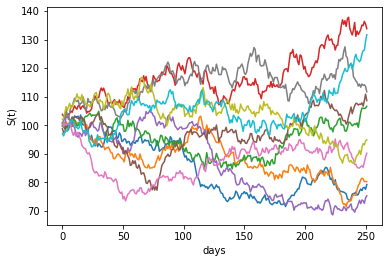

In [5]:
#Sample paths

for i in paths[:10,:]:
    plt.plot(i)
plt.xlabel('days')
plt.ylabel('S(t)')

In [6]:
#claim's price

np.mean(np.exp(-r*T)*(np.maximum(paths[:,-1]-K,0)))

10.45888423326182

In [7]:
#Black-Sholes formula

blacksholescall(S0,K,sigma,r,T)

10.450583572185565

***
$\mathbf{\text{Path dependency - Forward start option}}$<br>
***

A forward start option is an European call with strike price equal to the stock price at a given time before maturity. Formally, the payoff at maturity is,

$$
F(S(T),T)=\text{max}(S(T)-S(t_1),0), \quad t_1<T.
$$

This claim admits a closed form expression in terms of the standard Black-Sholes formula for the European call, 

$$
F(S(t),t)=D(S(0),S(0),\sigma, r, T-t_1),
$$

where we denoted with $D(S(t),K,\sigma,r,T)$ the Black-Sholes formula for the European call option with maturity $T-t_1$, strike price $K$, volatility $\sigma$ and risk-free interest rate $r$. 

In [8]:
N_Days=252
N_Runs=500000

T=1
t1=0.3

S0=100
K=100
r=0.05
sigma=0.2
dt=1/N_Days

In [9]:
X=np.random.randn(N_Runs,int(T*N_Days))
inc=(1+r*dt+sigma*np.sqrt(dt)*X)
paths=np.cumprod(inc,1)*S0

In [10]:
np.mean(np.exp(-r*T)*(np.maximum(paths[:,-1]-paths[:,int(t1*N_Days)],0)))

8.371968084495109

In [11]:
#comparison with analytic solution

blacksholescall(S0,S0,sigma,r,T-t1)

8.415340538034833

***
$\mathbf{\text{Multiple underlyings - Exchange option}}$<br>
***

The previous analysis can be extened to claims on multiple underlyings $C(S_1(t),S_2(t),\dots,t)$, by considering,

$$
dS_i(t)= S_i(t)r dt+S_i(t)\sigma_i dW_i^Q(t) ,\\
$$

where,

$$
dW_i^Q(t)= dW_i(t)+\frac{\mu_i-r}{\sigma}dt.
$$

A natural application of this framework is to 'exchange options', whose payoff at maturity is,

$$
E(S_1(T),S_2(T),T)=\text{max}(S_1(T)-S_2(T),0).
$$

This example is particularly interesting bacause a closed form solution exists and is in terms of the standard Black-Scholes formula,

$$
E(S_1(t),S_2(t),t)=S_2(t) D(S_1(t)/S_2(t),1,\sigma_E,0,T),
$$

where,

$$
\sigma_E=\sqrt{\sigma_1^2+\sigma_2^2-2 \rho\sigma_1 \sigma_2},
$$

with $\rho$ the correlation of the relevant Wiener processes, $E(W_1(t)W_2(t))=\rho t$, and $D(S(t),K,\sigma,r,T)$ the Black-Sholes formula for the European call option with maturity $T$, strike price $K$, volatility $\sigma$ and risk-free interest rate $r$. 


In [12]:
#Exchange option

In [13]:
T=2
N_Days=252
N_Runs=500000
S01=100
S02=120
sigma1=0.2
sigma2=0.15
rho=0.5
dt=1/N_Days


X1=np.random.randn(N_Runs,int(T*N_Days))
X2=rho*X1+(np.sqrt(1-rho**2))*np.random.randn(N_Runs,int(T*N_Days))

inc1=(1+r*dt+sigma1*np.sqrt(dt)*X1)
inc2=(1+r*dt+sigma2*np.sqrt(dt)*X2)

paths1=np.cumprod(inc1,1)*S01
paths2=np.cumprod(inc2,1)*S02

Text(0, 0.5, 'S_1(t)')

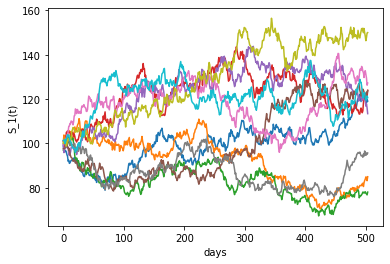

In [14]:
for i in paths1[:10,:]:
    plt.plot(i)
plt.xlabel('days')
plt.ylabel('S_1(t)')

Text(0, 0.5, 'S_2(t)')

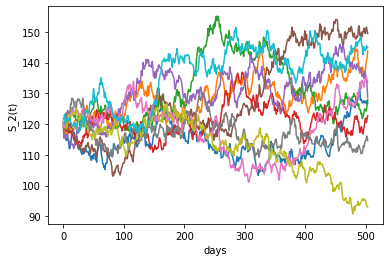

In [15]:
for i in paths2[:10,:]:
    plt.plot(i)
plt.xlabel('days')
plt.ylabel('S_2(t)')

In [16]:
#Monte-Carlo estimate

np.mean(np.exp(-r*T)*(np.maximum(paths1[:,-1]-paths2[:,-1],0)))

3.8374771714755496

In [17]:
#comparison with analytic solution

sigmaE=np.sqrt(sigma1**2+sigma2**2-2*rho*sigma1*sigma2)
S02*blacksholescall(S01/S02,1,sigmaE,0,T)

3.871263426681655